## Bike Buyers
This dataset has details of 1000 users from different backgrounds and whether or not they buy a bike. This data can be used for prediction models using Machine Learning Algorithms. There are some NA values injected in the dataset. Use this dataset for Data Cleaning, Exploration and Visualization.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier

In [3]:
# read the dataset
df = pd.read_csv('bike_buyers.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


### Data Checking

In [4]:
# structure of the dataset
df.shape

(1000, 13)

In [5]:
# brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [6]:
# brief statistic infomation
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [7]:
# columns in the dataset
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [8]:
# check the number of null data
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

### Data Cleansing

#### null values

In [9]:
# only show columns that have null data
null_col = df.columns[df.isna().sum()>0].tolist()
df[null_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marital Status  993 non-null    object 
 1   Gender          989 non-null    object 
 2   Income          994 non-null    float64
 3   Children        992 non-null    float64
 4   Home Owner      996 non-null    object 
 5   Cars            991 non-null    float64
 6   Age             992 non-null    float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [10]:
# percentage of null values for each column
(df.isna().sum()[df.isna().sum()>0]/1000)*100

Marital Status    0.7
Gender            1.1
Income            0.6
Children          0.8
Home Owner        0.4
Cars              0.9
Age               0.8
dtype: float64

In [11]:
# see null values for 'Marital Status'
df[df['Marital Status'].isna()].head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
27,18283,NaN,Female,100000.0,0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,40.0,No
49,14939,NaN,Male,40000.0,0.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,39.0,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
150,26154,NaN,Male,60000.0,1.0,Partial College,Skilled Manual,Yes,1.0,5-10 Miles,Pacific,43.0,Yes


In [12]:
# check the values of the Marital Status column
df["Marital Status"].value_counts()

Married    535
Single     458
Name: Marital Status, dtype: int64

In [13]:
# fill the null values to "Married"
df["Marital Status"].fillna("Married",inplace=True)

In [14]:
# see null values for 'Gender'
df[df['Gender'].isna()].head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
154,23426,Single,NaN,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No
335,24369,Married,NaN,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No
601,29231,Single,NaN,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No


In [15]:
# fill the null values to "Male"
df["Gender"].fillna("Male",inplace=True)

In [16]:
# see null values for 'Home Owner'
df[df['Home Owner'].isna()].head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
365,22636,Single,Female,40000.0,0.0,Bachelors,Clerical,NaN,0.0,0-1 Miles,Europe,38.0,Yes
646,16247,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,NaN,0.0,1-2 Miles,North America,47.0,No
943,24322,Married,Female,60000.0,4.0,Bachelors,Skilled Manual,NaN,2.0,0-1 Miles,North America,42.0,No


In [17]:
# check the values of the Home Owner column
df["Home Owner"].value_counts()

Yes    682
No     314
Name: Home Owner, dtype: int64

In [18]:
# fill the null values to "Yes"
df["Home Owner"].fillna("Yes",inplace=True)

In [19]:
# fill the null vales of Income, Children, Cars, 
# Age columns to their mean or median value
df.fillna({'Income': df['Income'].mean(),\
         'Children': df['Children'].median(),\
         'Cars': df['Cars'].median(),\
         'Age': df['Age'].median()},inplace=True)

In [20]:
# check if null values are all removed
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

#### outliers

In [21]:
# check the difference between min - 25% and 75% - max
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56267.605634,1.911000,1.451000,44.172000
std,5347.333948,30974.380206,1.620403,1.117519,11.316912
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


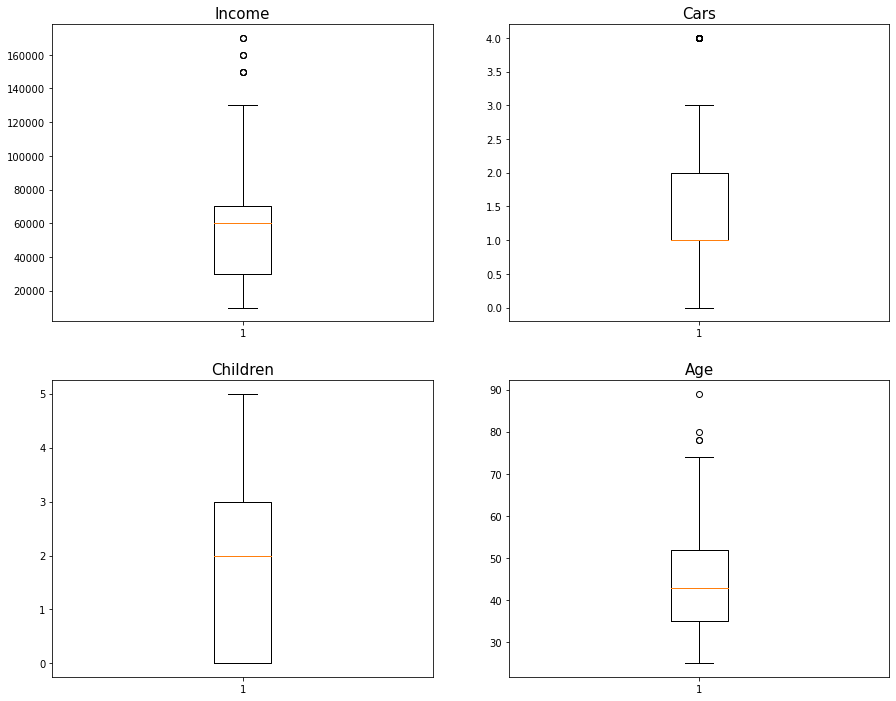

In [22]:
# check outliers with boxplots
fig, ax = plt.subplots(2,2, figsize= (15,12))
row, col = 0, 0
for i in ["Income","Children","Cars","Age"]:
    box = ax[row,col].boxplot(df[i])
    ax[row,col].set_title(i,fontsize=15)
    row +=1
    if row == 2:
        row = 0
        col += 1
# Income seems to have outliers
# Age also seems to have outliers

In [23]:
# find index of outliers in the Income column
income_outlier = df.index[df['Income']>140000].tolist()
income_outlier

[6, 12, 43, 121, 178, 259, 321, 356, 829, 993]

In [24]:
# find index of outliers in the Age column
age_outlier = df.index[df['Age']>75].tolist()
age_outlier

[250, 375, 401, 595]

In [25]:
# drop the outliers from the dataset
for i in [income_outlier,age_outlier]:
    df.drop(i,inplace=True)

Text(0.5, 1.0, 'Age')

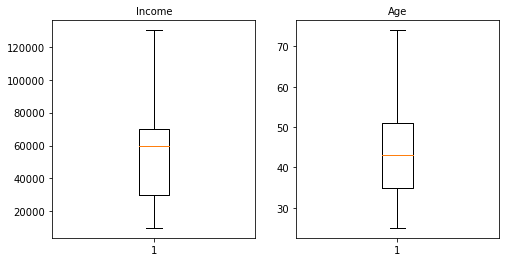

In [26]:
# check if outliers are removed
fig, ax = plt.subplots(1,2, figsize = (8,4))
ax[0].boxplot(df["Income"])
ax[1].boxplot(df["Age"])
ax[0].set_title("Income",fontsize=10)
ax[1].set_title("Age",fontsize=10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                986 non-null    int64  
 1   Marital Status    986 non-null    object 
 2   Gender            986 non-null    object 
 3   Income            986 non-null    float64
 4   Children          986 non-null    float64
 5   Education         986 non-null    object 
 6   Occupation        986 non-null    object 
 7   Home Owner        986 non-null    object 
 8   Cars              986 non-null    float64
 9   Commute Distance  986 non-null    object 
 10  Region            986 non-null    object 
 11  Age               986 non-null    float64
 12  Purchased Bike    986 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.8+ KB


In [28]:
# remove ID column because it is not related to analyzing
df.drop(columns="ID",inplace=True)

In [29]:
df.columns

Index(['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

### Data Browsing

In [30]:
# copy the orignal dataframe
df_bw = df.copy()

In [31]:
# encode 'Purchased Bike' (label) to 1 or 0
df_bw['Purchased Bike'] = LabelEncoder().fit_transform(df_bw['Purchased Bike'])

In [32]:
df_bw.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
3,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,1
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1


In [33]:
df_bw.corr()

,Income,Children,Cars,Age,Purchased Bike
Income,1.000000,0.267123,0.416835,0.174129,0.031425
Children,0.267123,1.000000,0.285058,0.536773,-0.124675
Cars,0.416835,0.285058,1.000000,0.194397,-0.211386
Age,0.174129,0.536773,0.194397,1.000000,-0.100630
Purchased Bike,0.031425,-0.124675,-0.211386,-0.100630,1.000000


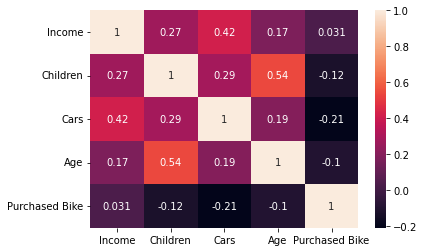

In [34]:
ax = sns.heatmap(df_bw.corr(), annot=True)

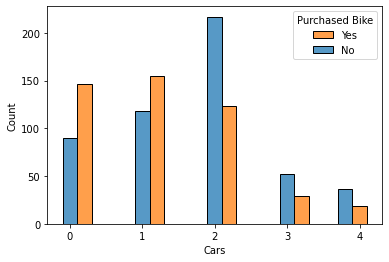

In [35]:
# relationship between the number of cars and bike
sns.histplot(data=df_bw, x="Cars",hue= "Purchased Bike", multiple="dodge", shrink=2)
plt.legend(title='Purchased Bike', loc='upper right', labels=['Yes', 'No'])

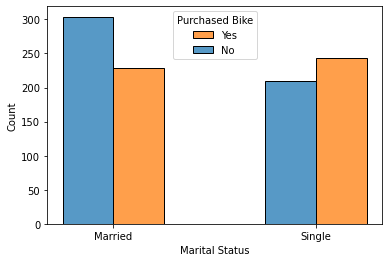

In [36]:
# relationship between the marital status and bike
sns.histplot(data=df_bw, x="Marital Status",hue= "Purchased Bike",shrink=0.5, multiple="dodge")
plt.legend(title='Purchased Bike', loc='upper center', labels=['Yes', 'No'])

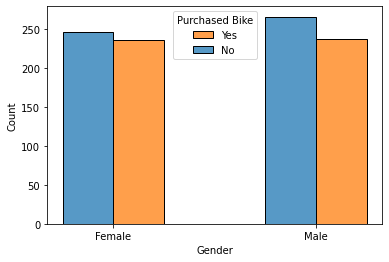

In [37]:
# relationship between the gender and bike
sns.histplot(data=df_bw, x="Gender",hue= "Purchased Bike",shrink=0.5, multiple="dodge")
plt.legend(title='Purchased Bike', loc='upper center', labels=['Yes', 'No'])

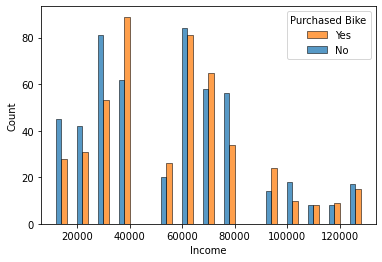

In [38]:
# relationship between the income and bike
sns.histplot(data=df_bw, x="Income",hue= "Purchased Bike",shrink=0.5, multiple="dodge")
plt.legend(title='Purchased Bike', loc='best', labels=['Yes', 'No'])

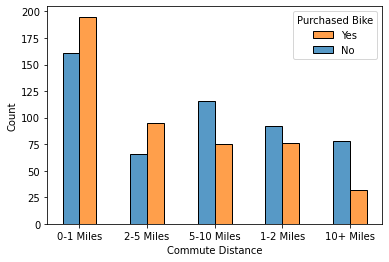

In [39]:
# relationship between the commute distance and bike
sns.histplot(data=df_bw, x="Commute Distance",hue= "Purchased Bike",shrink=0.5, multiple="dodge")
plt.legend(title='Purchased Bike', loc='best', labels=['Yes', 'No'])

### Clustering

In [40]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics

#### dimensionality reduction and scaling

In [41]:
# changing all categorical features to numerical features
categorical = []
df_en = df.copy()
for i in df.columns:
    if df[i].dtype == "object":
        categorical.append(i)
for i in categorical:
    df_en[i]= LabelEncoder().fit_transform(df[i])
    
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    986 non-null    int32  
 1   Gender            986 non-null    int32  
 2   Income            986 non-null    float64
 3   Children          986 non-null    float64
 4   Education         986 non-null    int32  
 5   Occupation        986 non-null    int32  
 6   Home Owner        986 non-null    int32  
 7   Cars              986 non-null    float64
 8   Commute Distance  986 non-null    int32  
 9   Region            986 non-null    int32  
 10  Age               986 non-null    float64
 11  Purchased Bike    986 non-null    int32  
dtypes: float64(4), int32(8)
memory usage: 69.3 KB


Scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function. Without scaling features, the algorithm may be biased toward the feature which has values higher in magnitude.

In [42]:
# scaling
scaler = StandardScaler()
scaler.fit(df_en)
df_scale = pd.DataFrame(scaler.transform(df_en), columns=df_en.columns)
df_scale

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,-0.921904,-1.020494,-0.520216,-0.559649,-1.202470,1.196085,0.674001,-1.297197,-1.062452,-1.294412,-0.178357,-0.960223
1,-0.921904,0.979918,-0.861316,0.676216,1.009536,-1.552959,0.674001,-0.393923,-1.062452,-1.294412,-0.088219,-0.960223
2,-0.921904,0.979918,0.844185,1.912082,1.009536,0.508824,-1.483677,0.509351,0.859709,-1.294412,1.444136,-0.960223
3,1.084712,0.979918,0.503085,-1.177582,-1.202470,0.508824,0.674001,-0.393923,1.500429,1.602955,-0.268496,1.041425
4,1.084712,0.979918,-0.861316,-1.177582,-1.202470,-1.552959,-1.483677,-1.297197,-1.062452,-1.294412,-0.719188,1.041425
...,...,...,...,...,...,...,...,...,...,...,...,...
981,-0.921904,0.979918,0.161984,0.058284,0.272201,0.508824,0.674001,0.509351,0.859709,0.154272,0.903305,1.041425
982,1.084712,0.979918,0.503085,1.294149,-0.465134,0.508824,0.674001,-1.297197,0.859709,0.154272,-0.809327,1.041425
983,-0.921904,0.979918,0.161984,0.058284,-1.202470,1.196085,0.674001,-1.297197,-1.062452,0.154272,-0.538911,1.041425
984,1.084712,0.979918,1.526385,0.676216,-1.202470,-0.865698,-1.483677,1.412626,-0.421732,0.154272,-0.538911,-0.960223


Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [43]:
# reduce dimentions using PCA
pca = PCA(n_components=3)
pca.fit(df_scale)
PCA_df = pd.DataFrame(pca.transform(df_scale), columns=(["col1","col2", "col3"]))
PCA_df.describe()

,col1,col2,col3
count,9.860000e+02,9.860000e+02,9.860000e+02
mean,-5.708753e-17,5.354067e-17,8.253484e-17
std,1.531138e+00,1.254731e+00,1.185710e+00
min,-3.429656e+00,-3.158967e+00,-2.896069e+00
25%,-1.265473e+00,-8.836928e-01,-9.462069e-01
50%,1.125928e-01,-1.761622e-02,-1.950332e-03
75%,1.270065e+00,9.123375e-01,8.358404e-01
max,3.697362e+00,3.375744e+00,3.197340e+00


Text(0.5, 0.92, 'Reduced Dimension')

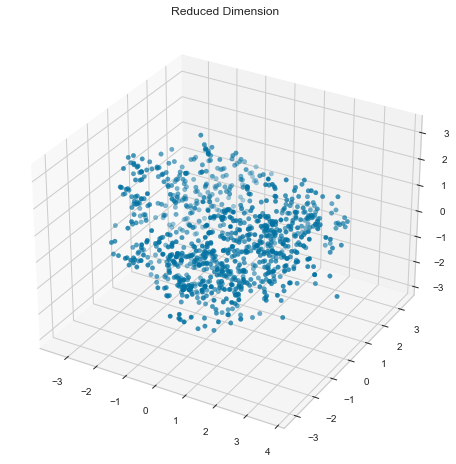

In [44]:
# draw 3D plot
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("Reduced Dimension")

the elbow method is a heuristic used in determining the number of clusters in a data set

C:\Users\Lesson6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Lesson6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Lesson6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Lesson6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak o

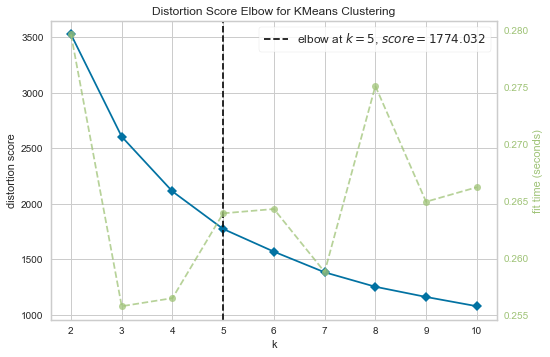

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# decide the number of clusters to make
k_elbow = KElbowVisualizer(KMeans(), k=10)
k_elbow.fit(PCA_df)
k_elbow.show()

In [46]:
# make a clustering model
AC = AgglomerativeClustering(n_clusters=5)
AC_pred = AC.fit_predict(PCA_df)

PCA_df["Clusters"] = AC_pred
PCA_df

,col1,col2,col3,Clusters
0,-1.244564,1.302104,-1.025430,3
1,-0.880557,2.220628,1.286171,1
2,1.882274,0.703037,1.937525,4
3,0.521432,-1.859110,-2.055844,0
4,-3.065150,0.280486,-0.598017,0
...,...,...,...,...
981,1.249371,0.076143,-0.576714,2
982,0.201168,-0.480199,-1.348231,0
983,-0.459614,0.380078,-2.538501,0
984,0.976842,-0.783853,0.613621,4


Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Text(0.5, 0.92, 'The Result Plot')

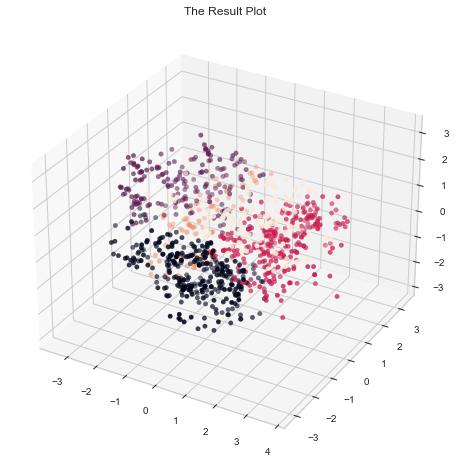

In [47]:
# draw the result
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=PCA_df["Clusters"], marker='o', cmap="rocket")
ax.set_title("The Result Plot")

In [48]:
# add prediction to copied original dataset
df_cl = df.copy()
df_cl["Clusters"]= AC_pred

Text(0.5, 1.0, 'Counts of Clusters')

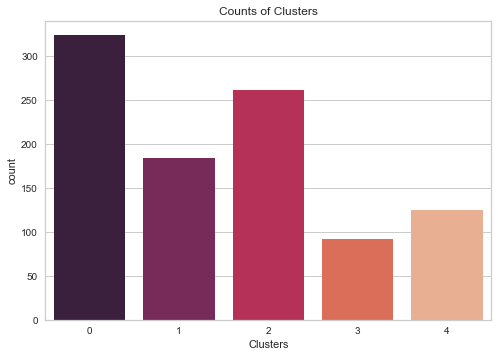

In [49]:
# draw countplot of clusters
graph = sns.countplot(x=df_cl["Clusters"], palette= "rocket")
graph.set_title("Counts of Clusters")

Text(0.5, 1.0, 'Counts of Clusters for Purchased Bike')

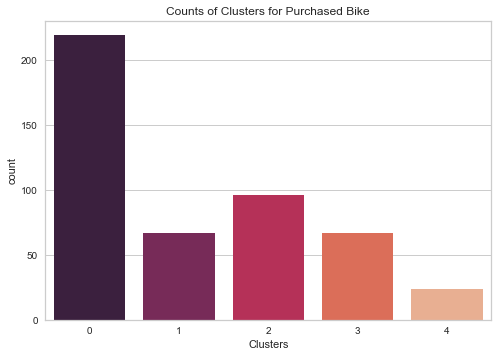

In [50]:
# draw countplot of clusters with Purchased Bike
df_buy = df_cl[df_cl["Purchased Bike"] == "Yes"]
graph = sns.countplot(x=df_buy["Clusters"], palette= "rocket")
graph.set_title("Counts of Clusters for Purchased Bike")
# no.0 cluster looks like an ideal target

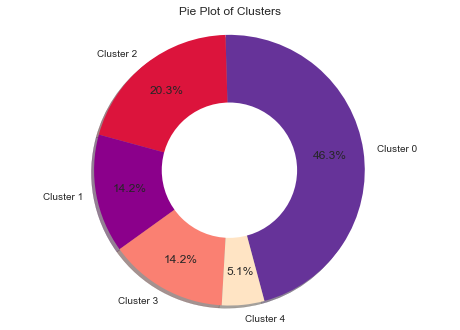

In [51]:
# draw pie chart
values = df_buy['Clusters'].value_counts().tolist()
labels = ["Cluster 0","Cluster 2","Cluster 1","Cluster 3","Cluster 4"]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True, startangle=285,\
        pctdistance=0.75, colors=['rebeccapurple', 'crimson', 'darkmagenta','salmon', 'bisque'])
ax1.axis('equal')
plt.title('Pie Plot of Clusters')
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

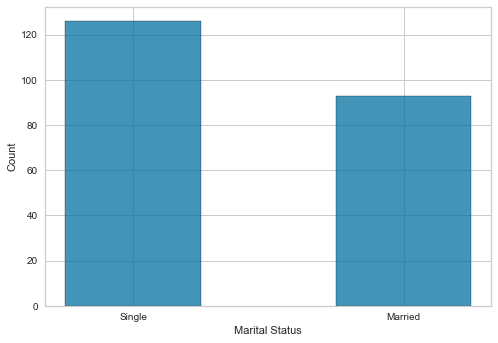

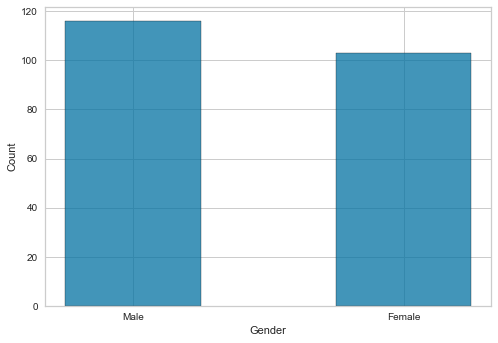

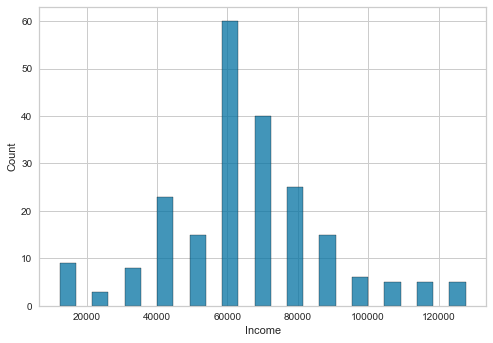

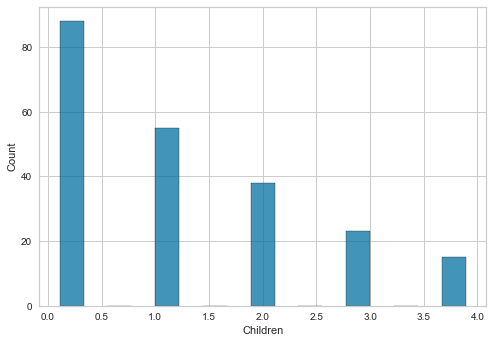

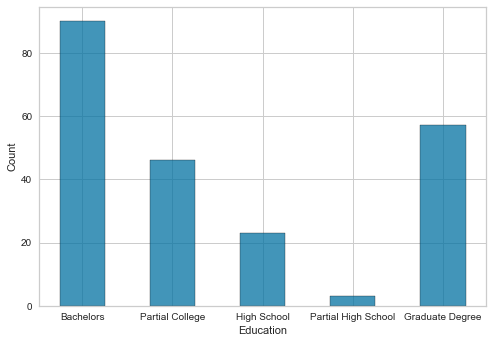

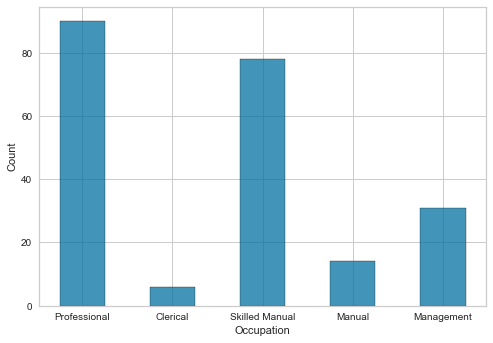

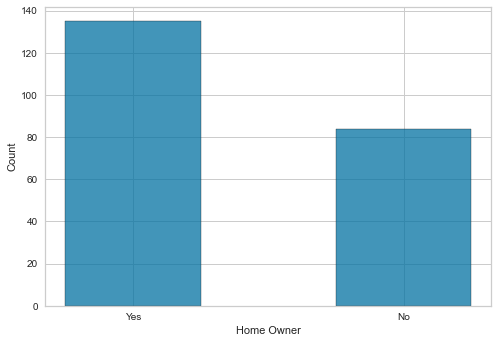

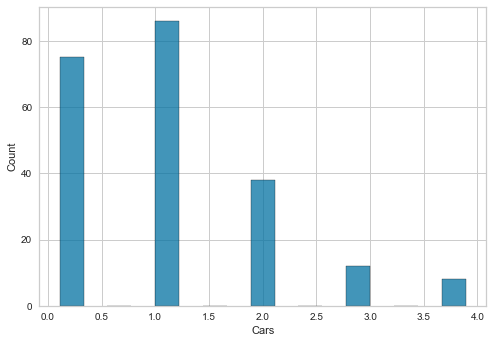

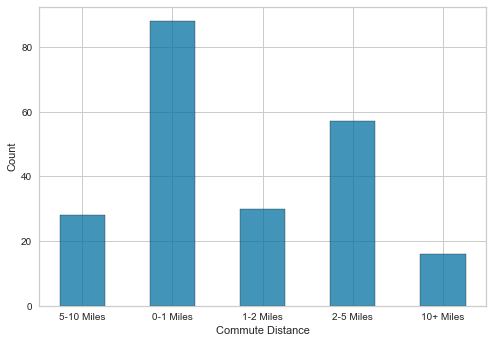

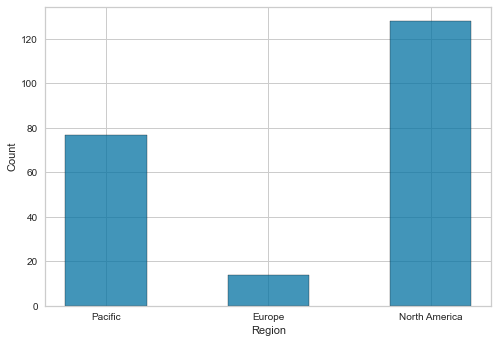

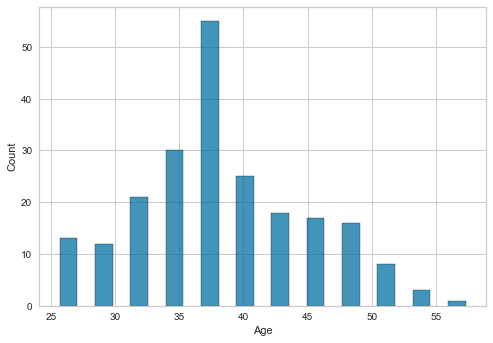

In [52]:
df_buy_cluster0 = df_buy[df_buy["Clusters"]==0]
cols = df_buy_cluster0.drop(columns=["Purchased Bike","Clusters"]).columns
for i in cols :
    plt.figure()
    sns.histplot(data=df_buy_cluster0, x=i , shrink=0.5, multiple="dodge")
    

As a result, the chracteristics of Cluster_0 are: 
- income (60k to 70k)
- no kid (0 to 1)
- bachelor's degree
- occupation (professional & skilled manual)
- homeowner
- cars (0 to 1)
- commute distance (0 to 1 mile)
- North America
- Age (35 to 40)

### Regression

In [53]:
# copy the original dataframe
df_en2 = df.copy()

In [54]:
df_en2.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [55]:
categorical = []
df_en2 = df.copy()
for i in df.columns:
    if df[i].dtype == "object":
        categorical.append(i)
for i in categorical:
    df_en2[i]= LabelEncoder().fit_transform(df[i])

In [56]:
df_en2.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
3,1,1,70000.0,0.0,0,3,1,1.0,4,2,41.0,1
4,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1


#### XGBoost

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [57]:
# split the train set and the test set
train, test = train_test_split(df_en2,test_size=0.2, random_state=0)

In [58]:
train.shape, test.shape

((788, 12), (198, 12))

In [59]:
# define input(X) and output(Y) for the train set and the test set
train_X = train.drop(columns="Purchased Bike")
train_Y = train["Purchased Bike"]
test_X = test.drop(columns="Purchased Bike")
test_Y = test["Purchased Bike"]

In [60]:
# scaling
scaler=StandardScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)

In [61]:
# fit model using XGBoost
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
# prediction 
pred = model.predict(test_X)
pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [63]:
# compare the real Y values to predictions
output = pd.DataFrame(list(test_Y),columns=["Y"])
output["Prediction"] = list(pred)
output.head(20)

,Y,Prediction
0,1,0
1,0,0
2,1,0
3,1,0
4,1,1
5,1,1
6,1,1
7,1,0
8,0,0
9,1,1


In [64]:
# check the accuracy of predictions
accuracy = accuracy_score(test_Y,pred)
print("{}%".format(round(accuracy*100,2)))

67.17%


#### random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [66]:
rf = RandomForestClassifier(criterion='gini',n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_X, train_Y)

# out-of-bag score
print("%.4f" % rf.oob_score_)

C:\Users\Lesson6\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6992


In [67]:
pred_rf = rf.predict(test_X)
output_rf = pd.DataFrame(list(test_Y),columns=["Y"])
output_rf["Prediction"] = list(pred_rf)
output_rf.head(20)

,Y,Prediction
0,1,0
1,0,0
2,1,0
3,1,0
4,1,1
5,1,1
6,1,1
7,1,0
8,0,0
9,1,1


In [68]:
# check the accuracy of predictions
accuracy_rf = accuracy_score(test_Y,pred_rf)
print("{}%".format(round(accuracy*100,2)))

67.17%


As a result, the chracteristics of Cluster_0 are: 
- single
- male
- income (60k to 70k)
- no kid (0 to 1)
- bachelor's degree
- occupation (professional & skilled manual)
- homeowner
- cars (0 to 1)
- commute distance (0 to 1 mile)
- North America
- Age (35 to 40)

In [69]:
target = df.copy()
target = target.reset_index(drop=True)
target.loc[986] = ["Single","Male", 65000, 0, "Bachelors", "Professional", "Yes", "0", "0-1 Miles", "North America", 36, "No"]
target

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
982,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
983,Married,Male,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
984,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
985,Single,Male,60000.0,3.0,High School,Professional,Yes,2.0,10+ Miles,North America,53.0,Yes


In [70]:
for i in categorical:
    target[i]= LabelEncoder().fit_transform(target[i])
target_X = target.drop(columns="Purchased Bike")
target_X

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0
1,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0
2,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0
3,1,1,70000.0,0.0,0,3,1,1.0,4,2,41.0
4,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0
...,...,...,...,...,...,...,...,...,...,...,...
982,1,1,70000.0,4.0,1,3,1,0.0,3,1,35.0
983,0,1,60000.0,2.0,0,4,1,0.0,0,1,38.0
984,1,1,100000.0,3.0,0,1,0,3.0,1,1,38.0
985,1,1,60000.0,3.0,2,3,1,2.0,2,1,53.0


In [71]:
pred_target = rf.predict(target_X.loc[986:987])
pred_target

C:\Users\Lesson6\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1])

In [73]:
target_X.loc[986:987].reset_index()

,index,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,986,1,1,65000.0,0.0,0,3,1,0,0,1,36.0
